In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

In [2]:
fraud_data=pd.read_csv("Fraud_check.csv")

# EDA

In [3]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
# Dealing with categorical of independent
fraud_data=pd.get_dummies(fraud_data,columns=["Undergrad","Marital.Status","Urban"],drop_first=True)

In [6]:
fraud_data["Taxable.Income"]=fraud_data["Taxable.Income"].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [7]:
fraud_data["Taxable.Income"].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

# Visualizing

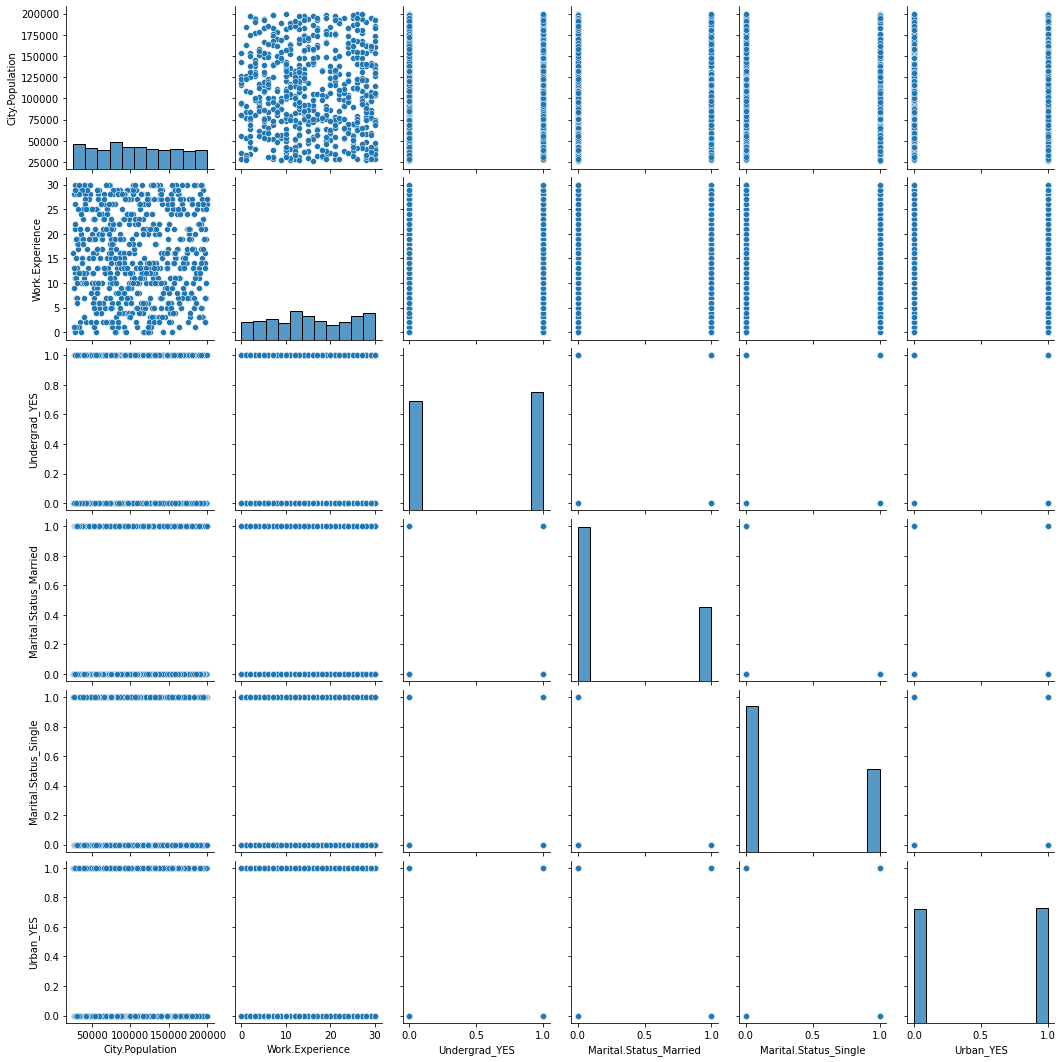

In [8]:
sns.pairplot(fraud_data)

### Train Test Split

In [9]:
x=fraud_data.drop(columns=["Taxable.Income"])
y=fraud_data["Taxable.Income"]

In [10]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=42)

In [11]:
x_train.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_YES',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES'],
      dtype='object')

# Model building

In [12]:
model=DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [13]:
cv=KFold(n_splits=10)
modelll=DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
scores=cross_val_score(model,x_train,y_train,cv=cv)


In [14]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [15]:
scores

array([0.83333333, 0.75      , 0.79166667, 0.70833333, 0.8125    ,
       0.83333333, 0.8125    , 0.79166667, 0.83333333, 0.77083333])

In [16]:
scores.mean()

0.79375

# Hyperparameter tuning

In [17]:
max_depth = list(range(1,10))
criterion=["gini", "entropy", "log_loss"]
parameters = {"criterion" : criterion, "max_depth" : max_depth}

model = DecisionTreeClassifier()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(x, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [18]:
print(grid.best_score_)
print(grid.best_params_)

0.7933333333333332
{'criterion': 'gini', 'max_depth': 1}


# Vizualizing

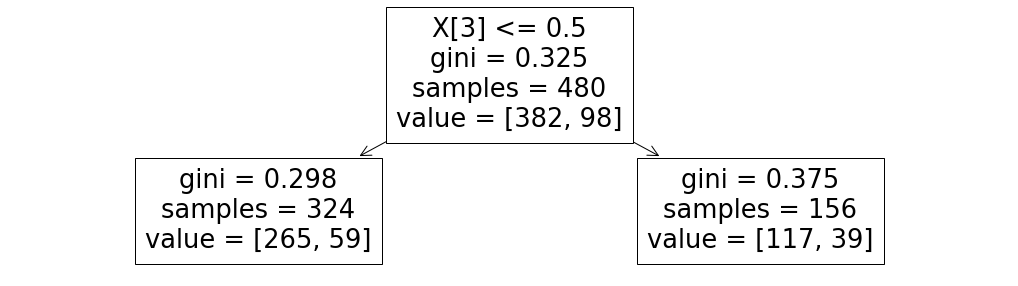

In [19]:
model=DecisionTreeClassifier(criterion = 'gini', max_depth = 1)
model.fit(x_train,y_train)

#PLot the decision tree
plt.figure(figsize=(18,5))
plot_tree(model)
plt.show()

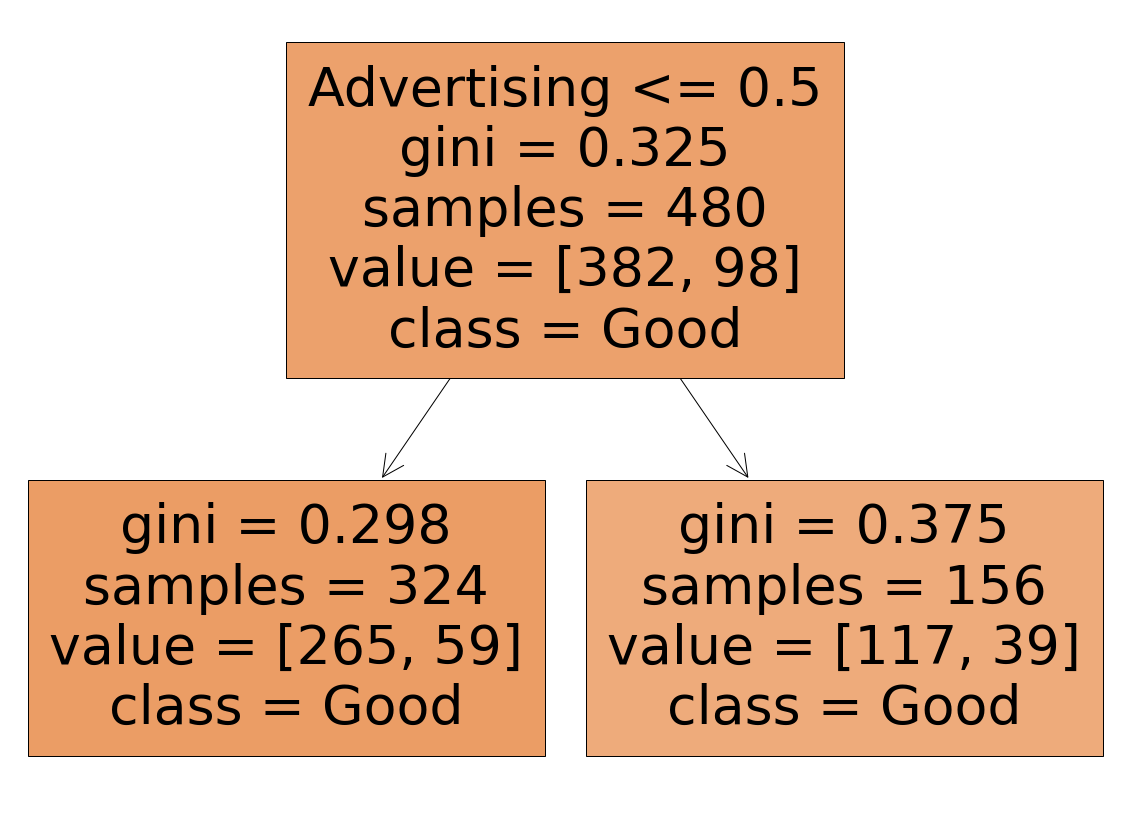

In [20]:
fn=['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price','Age', 'Education', 'Urban_Yes', 'US_Yes'] #feature names
cn=['Good', 'Mediam', 'Bad'] #class names
plt.figure(figsize = (20,15))
plot_tree(model,
          feature_names = fn, 
          class_names = cn,
          filled = True)

plt.show()

In [21]:
y_pred=model.predict(x_test)
classification_report(y_test,y_pred)

C:\Users\cpakh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cpakh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cpakh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n        Good       0.78      1.00      0.88        94\n       Risky       0.00      0.00      0.00        26\n\n    accuracy                           0.78       120\n   macro avg       0.39      0.50      0.44       120\nweighted avg       0.61      0.78      0.69       120\n'